In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from tqdm import tqdm

In [2]:
df_data_pump = pd.read_csv('data_pump_not_ico.csv')
df_data_not_pump = pd.read_csv('data_not_pump.csv')

In [3]:
df_pump_cand = df_data_pump[['market','start','last_slope', 'last_slope_adi',
       'aroon_up', 'aroon_down', 'aroon_diff', 'macd_diff', 'macd_line',
       'macd_signal', 'stochastic', 'stochastic_signal', 'delta_stochastic',
       'rsi_val', 'coef_corr', 'last_slope_btc']]
df_not_pump_cand = df_data_not_pump[['market','start','last_slope', 'last_slope_adi',
       'aroon_up', 'aroon_down', 'aroon_diff', 'macd_diff', 'macd_line',
       'macd_signal', 'stochastic', 'stochastic_signal', 'delta_stochastic',
       'rsi_val', 'coef_corr', 'last_slope_btc']]

In [4]:
df_not_pump_cand['is_pump'] = np.zeros(len(df_not_pump_cand))
df_pump_cand['is_pump'] = np.ones(len(df_pump_cand))

C:\Users\asus\AppData\Local\Temp\ipykernel_12300\2822038541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pump_cand['is_pump'] = np.ones(len(df_pump_cand))


In [5]:
df_combine = pd.concat([df_not_pump_cand,df_pump_cand])
idx = 438
var = df_combine.iloc[438]
var


market                  WBTCBTC
start                2022-05-08
last_slope             1.097011
last_slope_adi        -0.168437
aroon_up                   88.0
aroon_down                 72.0
aroon_diff                 16.0
macd_diff              1.190842
macd_line               5.33833
macd_signal            4.147488
stochastic            48.648649
stochastic_signal      49.54955
delta_stochastic      -0.900901
rsi_val               52.866453
coef_corr               0.06536
last_slope_btc        -0.516036
is_pump                     0.0
Name: 438, dtype: object

In [6]:
weight_data_pump = len(df_data_not_pump)/len(df_data_pump)
weight_data_pump

1.7243532560214094

LAST SLOPE

In [7]:
last_slope_val = var['last_slope']
band = 0.1
last_slope = {}
num_pump = weight_data_pump*len(df_data_pump.loc[(df_data_pump['last_slope'] >= last_slope_val - band) & (df_data_pump['last_slope'] <= last_slope_val + band)])
num_not_pump = len(df_data_not_pump.loc[(df_data_not_pump['last_slope'] >= last_slope_val - band) & (df_data_not_pump['last_slope'] <= last_slope_val + band)])
last_slope['1'] = num_pump/(num_pump+num_not_pump)
last_slope['0'] = 1 - last_slope['1']
last_slope

{'1': 0.4378043453642438, '0': 0.5621956546357563}

MACD LINE - SIGNAL

In [8]:
macd_line_val = var['macd_line']
macd_signal_val = var['macd_signal']
band_line = 0.5
band_signal = 0.5
macd_line_signal = {}
temp = df_combine.loc[(df_combine['macd_signal'] >= macd_signal_val - band_signal) &
                      (df_combine['macd_signal'] <= macd_signal_val + band_signal) &
                      (df_combine['macd_line'] >= macd_line_val - band_line) &
                      (df_combine['macd_line'] <= macd_line_val + band_line)]
num_pump = weight_data_pump*sum(temp['is_pump'])
num_not_pump = len(temp['is_pump'])-sum(temp['is_pump'])
macd_line_signal['1'] = num_pump/(num_pump+num_not_pump)
macd_line_signal['0'] = 1 - macd_line_signal['1']
macd_line_signal

{'1': 0.3649924471299094, '0': 0.6350075528700906}

MACD DIFF

In [9]:
macd_diff_val = var['macd_diff']
band = 0.1
macd_diff = {}
num_pump = weight_data_pump*len(df_data_pump.loc[(df_data_pump['macd_diff'] >= macd_diff_val - band) & (df_data_pump['macd_diff'] <= macd_diff_val + band)])
num_not_pump = len(df_data_not_pump.loc[(df_data_not_pump['macd_diff'] >= macd_diff_val - band) & (df_data_not_pump['macd_diff'] <= macd_diff_val + band)])
macd_diff['1'] = num_pump/(num_pump+num_not_pump)
macd_diff['0'] = 1 - macd_diff['1']
macd_diff

{'1': 0.4508875463600103, '0': 0.5491124536399896}

STOCHASTIC AND STOCHASTIC SIGNAL

In [10]:
stochastic_val = var['stochastic']
stochastic_signal_val = var['stochastic_signal']
band_line = 2.5
band_signal = 2.5
stochastic_line_signal = {}
temp = df_combine.loc[(df_combine['stochastic'] >= stochastic_val - band_line) &
                      (df_combine['stochastic'] <= stochastic_val + band_line) &
                      (df_combine['stochastic_signal'] >= stochastic_signal_val - band_signal) &
                      (df_combine['stochastic_signal'] <= stochastic_signal_val + band_signal)]
num_pump = weight_data_pump*sum(temp['is_pump'])
num_not_pump = len(temp['is_pump'])-sum(temp['is_pump'])
stochastic_line_signal['1'] = num_pump/(num_pump+num_not_pump)
stochastic_line_signal['0'] = 1 - stochastic_line_signal['1']
stochastic_line_signal

{'1': 0.5771872200656912, '0': 0.42281277993430877}

RSI

In [11]:
rsi_val = var['rsi_val']
band = 2.5
rsi = {}
num_pump = weight_data_pump*len(df_data_pump.loc[(df_data_pump['rsi_val'] >= rsi_val - band) & (df_data_pump['rsi_val'] <= rsi_val + band)])
num_not_pump = len(df_data_not_pump.loc[(df_data_not_pump['rsi_val'] >= rsi_val - band) & (df_data_not_pump['rsi_val'] <= rsi_val + band)])
rsi['1'] = num_pump/(num_pump+num_not_pump)
rsi['0'] = 1 - rsi['1']
rsi

{'1': 0.5504314560374028, '0': 0.44956854396259716}

COEF CORR - SLOPE BTC

In [12]:
coef_corr_val = var['coef_corr']
slope_btc_val = var['last_slope_btc']
band_corr = 0.05
band_slope = 0.25
corr_slope_btc = {}
temp = df_combine.loc[(df_combine['coef_corr'] >= coef_corr_val - band_corr) &
                      (df_combine['coef_corr'] <= coef_corr_val + band_corr) &
                      (df_combine['last_slope_btc'] >= slope_btc_val - band_slope) &
                      (df_combine['last_slope_btc'] <= slope_btc_val + band_slope)]
num_pump = weight_data_pump*sum(temp['is_pump'])
num_not_pump = len(temp['is_pump'])-sum(temp['is_pump'])
corr_slope_btc['1'] = num_pump/(num_pump+num_not_pump)
corr_slope_btc['0'] = 1 - corr_slope_btc['1']
corr_slope_btc

{'1': 0.09209147212958552, '0': 0.9079085278704144}

In [13]:
arr_prob_last_slope = []
arr_prob_macd = []
arr_prob_macd_diff = []
arr_prob_stochastic = []
arr_prob_rsi = []
arr_prob_corr_btc = []

weight_data_pump = len(df_data_not_pump)/len(df_data_pump)
weight_data_pump

for i in tqdm(range(len(df_combine))):
    var = df_combine.iloc[i]
    last_slope_val = var['last_slope']
    band = 0.1
    last_slope = {}
    num_pump = weight_data_pump*len(df_data_pump.loc[(df_data_pump['last_slope'] >= last_slope_val - band) & (df_data_pump['last_slope'] <= last_slope_val + band)])
    num_not_pump = len(df_data_not_pump.loc[(df_data_not_pump['last_slope'] >= last_slope_val - band) & (df_data_not_pump['last_slope'] <= last_slope_val + band)])
    last_slope['1'] = num_pump/(num_pump+num_not_pump)
    last_slope['0'] = 1 - last_slope['1']
    
    macd_line_val = var['macd_line']
    macd_signal_val = var['macd_signal']
    band_line = 0.5
    band_signal = 0.5
    macd_line_signal = {}
    temp = df_combine.loc[(df_combine['macd_signal'] >= macd_signal_val - band_signal) &
                        (df_combine['macd_signal'] <= macd_signal_val + band_signal) &
                        (df_combine['macd_line'] >= macd_line_val - band_line) &
                        (df_combine['macd_line'] <= macd_line_val + band_line)]
    num_pump = weight_data_pump*sum(temp['is_pump'])
    num_not_pump = len(temp['is_pump'])-sum(temp['is_pump'])
    macd_line_signal['1'] = num_pump/(num_pump+num_not_pump)
    macd_line_signal['0'] = 1 - macd_line_signal['1']
    
    macd_diff_val = var['macd_diff']
    band = 0.1
    macd_diff = {}
    num_pump = weight_data_pump*len(df_data_pump.loc[(df_data_pump['macd_diff'] >= macd_diff_val - band) & (df_data_pump['macd_diff'] <= macd_diff_val + band)])
    num_not_pump = len(df_data_not_pump.loc[(df_data_not_pump['macd_diff'] >= macd_diff_val - band) & (df_data_not_pump['macd_diff'] <= macd_diff_val + band)])
    macd_diff['1'] = num_pump/(num_pump+num_not_pump)
    macd_diff['0'] = 1 - macd_diff['1']
    
    stochastic_val = var['stochastic']
    stochastic_signal_val = var['stochastic_signal']
    band_line = 2.5
    band_signal = 2.5
    stochastic_line_signal = {}
    temp = df_combine.loc[(df_combine['stochastic'] >= stochastic_val - band_line) &
                        (df_combine['stochastic'] <= stochastic_val + band_line) &
                        (df_combine['stochastic_signal'] >= stochastic_signal_val - band_signal) &
                        (df_combine['stochastic_signal'] <= stochastic_signal_val + band_signal)]
    num_pump = weight_data_pump*sum(temp['is_pump'])
    num_not_pump = len(temp['is_pump'])-sum(temp['is_pump'])
    stochastic_line_signal['1'] = num_pump/(num_pump+num_not_pump)
    stochastic_line_signal['0'] = 1 - stochastic_line_signal['1']
    
    rsi_val = var['rsi_val']
    band = 2.5
    rsi = {}
    num_pump = weight_data_pump*len(df_data_pump.loc[(df_data_pump['rsi_val'] >= rsi_val - band) & (df_data_pump['rsi_val'] <= rsi_val + band)])
    num_not_pump = len(df_data_not_pump.loc[(df_data_not_pump['rsi_val'] >= rsi_val - band) & (df_data_not_pump['rsi_val'] <= rsi_val + band)])
    rsi['1'] = num_pump/(num_pump+num_not_pump)
    rsi['0'] = 1 - rsi['1']
    
    coef_corr_val = var['coef_corr']
    slope_btc_val = var['last_slope_btc']
    band_corr = 0.05
    band_slope = 0.25
    corr_slope_btc = {}
    temp = df_combine.loc[(df_combine['coef_corr'] >= coef_corr_val - band_corr) &
                        (df_combine['coef_corr'] <= coef_corr_val + band_corr) &
                        (df_combine['last_slope_btc'] >= slope_btc_val - band_slope) &
                        (df_combine['last_slope_btc'] <= slope_btc_val + band_slope)]
    num_pump = weight_data_pump*sum(temp['is_pump'])
    num_not_pump = len(temp['is_pump'])-sum(temp['is_pump'])
    corr_slope_btc['1'] = num_pump/(num_pump+num_not_pump)
    corr_slope_btc['0'] = 1 - corr_slope_btc['1']
    
    arr_prob_last_slope.append(last_slope['1'])
    arr_prob_macd.append(macd_line_signal['1'])
    arr_prob_macd_diff.append(macd_diff['1'])
    arr_prob_stochastic.append(stochastic_line_signal['1'])
    arr_prob_rsi.append(rsi['1'])
    arr_prob_corr_btc.append(corr_slope_btc['1'])


100%|██████████| 3054/3054 [00:21<00:00, 142.67it/s]


In [14]:
df_combine['prob_last_slope'] = arr_prob_last_slope
df_combine['prob_macd'] = arr_prob_macd
df_combine['prob_macd_diff'] = arr_prob_macd_diff
df_combine['prob_stochastic'] = arr_prob_stochastic
df_combine['prob_rsi'] = arr_prob_rsi
df_combine['prob_corr_btc'] = arr_prob_corr_btc
df_combine.head()


,market,start,last_slope,last_slope_adi,aroon_up,aroon_down,aroon_diff,macd_diff,macd_line,macd_signal,...,rsi_val,coef_corr,last_slope_btc,is_pump,prob_last_slope,prob_macd,prob_macd_diff,prob_stochastic,prob_rsi,prob_corr_btc
0,MASKUSDT,2023-07-01,-0.259825,-0.725472,0.0,16.0,-16.0,-0.023778,-2.503912,-2.480134,...,43.963420,0.653069,1.942003,0.0,0.507421,0.462994,0.459444,0.428480,0.479427,0.496309
1,CHRBTC,2022-01-12,-1.185157,-0.396954,60.0,8.0,52.0,-0.383539,3.070371,3.453910,...,56.697912,0.343251,-0.518236,0.0,0.598608,0.694085,0.511860,0.325609,0.530461,0.256434
2,SSVUSDT,2023-11-24,0.519416,2.000122,100.0,16.0,84.0,0.751406,3.039644,2.288239,...,70.363615,-0.338339,0.590438,0.0,0.560546,0.508506,0.336502,0.147074,0.284655,0.256434
3,BNBBTC,2024-02-01,0.033239,-0.776591,64.0,8.0,56.0,-0.859078,0.454805,1.313883,...,43.436891,-0.724380,-0.439969,0.0,0.424554,0.537479,0.589653,0.681770,0.481049,0.392700
4,UNFIUSDT,2022-12-28,-0.188445,0.129813,16.0,100.0,-84.0,-0.048580,-1.303688,-1.255108,...,35.416810,-0.008336,-0.133785,0.0,0.490907,0.452963,0.470896,0.408193,0.540640,0.314988


<Axes: >

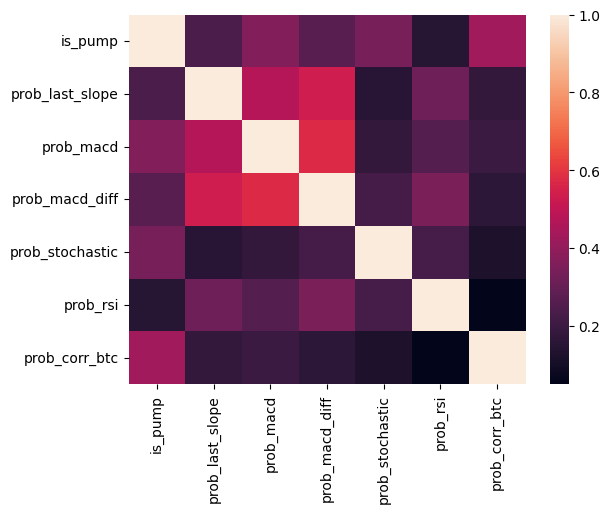

In [15]:
sns.heatmap(df_combine.loc[:, df_combine.columns.isin(['prob_last_slope', 'prob_macd','prob_macd_diff','prob_stochastic','prob_rsi','prob_corr_btc','is_pump'])].corr())

In [16]:

df_combine2 = df_combine.loc[:, df_combine.columns.isin(['prob_last_slope', 'prob_macd','prob_macd_diff','prob_stochastic','prob_rsi','prob_corr_btc','is_pump'])]
df_pump = df_combine2[df_combine2['is_pump'] == 1]
df_notpump = df_combine2[df_combine2['is_pump'] == 0]

df_pump_over = df_pump.sample(len(df_notpump), replace=True)

df_pump_over

,is_pump,prob_last_slope,prob_macd,prob_macd_diff,prob_stochastic,prob_rsi,prob_corr_btc
75,1.0,0.671880,1.000000,0.619937,0.656252,0.509774,1.000000
795,1.0,0.462994,1.000000,0.911864,0.515748,0.485045,0.462994
258,1.0,1.000000,0.632940,0.873376,0.632940,0.515882,1.000000
474,1.0,0.733969,1.000000,0.551907,0.681012,0.512283,0.462994
896,1.0,0.472544,0.495581,0.531946,0.575344,0.492989,1.000000
...,...,...,...,...,...,...,...
615,1.0,0.433278,0.449286,0.477232,0.642004,0.467772,0.340937
520,1.0,0.945186,1.000000,0.747222,0.645083,0.498580,1.000000
441,1.0,0.446812,0.416957,0.496656,0.508506,0.527035,0.408193
626,1.0,0.498911,0.437349,0.467204,0.575344,0.475394,0.721179


In [18]:
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE

df_combine3 = pd.concat([df_pump_over, df_notpump])

X_res = df_combine3.loc[:, df_combine3.columns.isin(['prob_last_slope', 'prob_macd','prob_macd_diff','prob_stochastic','prob_rsi','prob_corr_btc'])]
# X = scaler.fit_transform(X)
y_res = df_combine3['is_pump']
# ros = RandomOverSampler(random_state=0)
# X_res, y_res = SMOTE().fit_resample(X, y) #ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)



In [19]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
print(confusion_matrix(y_test, logreg.predict(X_test)))
print(classification_report(y_test, logreg.predict(X_test)))

[[295  84]
 [ 85 310]]
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       379
         1.0       0.79      0.78      0.79       395

    accuracy                           0.78       774
   macro avg       0.78      0.78      0.78       774
weighted avg       0.78      0.78      0.78       774



KNN

In [20]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[279 100]
 [ 75 320]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76       379
         1.0       0.76      0.81      0.79       395

    accuracy                           0.77       774
   macro avg       0.78      0.77      0.77       774
weighted avg       0.77      0.77      0.77       774



SVM

In [21]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC() # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[283  96]
 [ 72 323]]
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       379
         1.0       0.77      0.82      0.79       395

    accuracy                           0.78       774
   macro avg       0.78      0.78      0.78       774
weighted avg       0.78      0.78      0.78       774



DECISION TREE

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
pred = dt.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[288  91]
 [ 46 349]]
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       379
         1.0       0.79      0.88      0.84       395

    accuracy                           0.82       774
   macro avg       0.83      0.82      0.82       774
weighted avg       0.83      0.82      0.82       774



RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
 
# Fit the regressor with x and y data
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[319  60]
 [ 38 357]]
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       379
         1.0       0.86      0.90      0.88       395

    accuracy                           0.87       774
   macro avg       0.87      0.87      0.87       774
weighted avg       0.87      0.87      0.87       774



In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

# selector = RFE(gb, n_features_to_select=10, step=1)

# selector.fit(X_train, y_train)

gb.fit(X_train, y_train)

pred = gb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[290 105]
 [ 72 307]]
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.77       395
         1.0       0.75      0.81      0.78       379

    accuracy                           0.77       774
   macro avg       0.77      0.77      0.77       774
weighted avg       0.77      0.77      0.77       774



In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)

pred = gpc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[289  90]
 [ 83 312]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       379
         1.0       0.78      0.79      0.78       395

    accuracy                           0.78       774
   macro avg       0.78      0.78      0.78       774
weighted avg       0.78      0.78      0.78       774



In [24]:
import tensorflow as tf
from tensorflow import keras

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(len(X.columns),)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(1, activation="sigmoid")
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 32)                224       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1313 (5.13 KB)
Trainable params: 1313 (5.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [30]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, # you can set this to a big number!
                    batch_size=20,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/100
124/124 [==============================] - 2s 5ms/step - loss: 0.6461 - accuracy: 0.6373 - val_loss: 0.5906 - val_accuracy: 0.7108
Epoch 2/100
124/124 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.7364 - val_loss: 0.5125 - val_accuracy: 0.7286
Epoch 3/100
124/124 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7416 - val_loss: 0.4912 - val_accuracy: 0.7447
Epoch 4/100
124/124 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7537 - val_loss: 0.4812 - val_accuracy: 0.7447
Epoch 5/100
124/124 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7554 - val_loss: 0.4792 - val_accuracy: 0.7480
Epoch 6/100
124/124 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7529 - val_loss: 0.4768 - val_accuracy: 0.7512
Epoch 7/100
124/124 [==============================] - 1s 4ms/step - loss: 0.4726 - accuracy: 0.7529 - val_loss: 0.4745 - val_accuracy: 0.7609

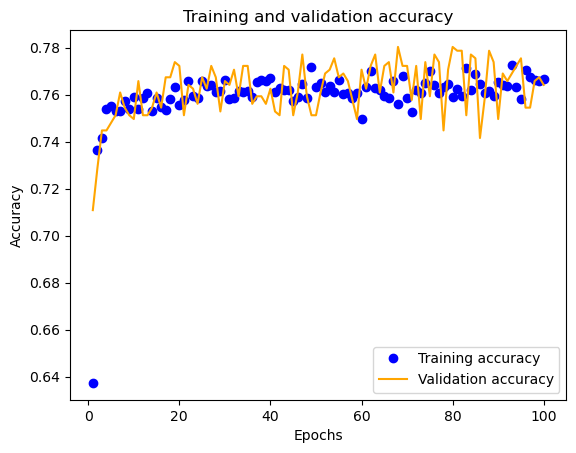

In [31]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
pred = model.predict(X_test)
pred = np.round(pred)
# pred
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

25/25 [==============================] - 0s 2ms/step
[[324  71]
 [110 269]]
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       395
         1.0       0.79      0.71      0.75       379

    accuracy                           0.77       774
   macro avg       0.77      0.77      0.76       774
weighted avg       0.77      0.77      0.77       774



In [29]:
# import pickle
import joblib

filename = 'logreg_model_mar.joblib'
# pickle.dump(logreg, open(filename, 'wb'))
joblib.dump(logreg, filename)

# filename = 'rf_model.sav'
# pickle.dump(rf, open(filename, 'wb'))

['logreg_model_mar.joblib']

In [28]:
# import joblib

joblib.dump(rf, "rf_model_mar.joblib")

['rf_model_mar.joblib']

In [23]:
joblib.dump(rf, "my_random_forest.joblib")

# load
loaded_rf = joblib.load("my_random_forest.joblib")


In [18]:
current_data = pd.read_csv('current_data_early_mar.csv')

In [24]:
X_now = current_data[['prob_last_slope','prob_macd','prob_macd_diff','prob_stochastic','prob_rsi','prob_corr_btc']]

In [25]:
pred = loaded_rf.predict(X_now)
current_data['prediction'] = pred
current_data.head()

,Unnamed: 0,market,last_slope,last_slope_adi,aroon_up,aroon_down,aroon_diff,macd_diff,macd_line,macd_signal,...,rsi_val,coef_corr,last_slope_btc,prob_last_slope,prob_macd,prob_macd_diff,prob_stochastic,prob_rsi,prob_corr_btc,prediction
0,2,1INCHUSDT,3.106811,0.306093,96.0,0.0,96.0,2.591268,11.604379,9.013111,...,70.735196,0.448768,1.150705,0.563940,0.000000,0.223236,0.364992,0.220070,0.579741,0.0
1,3,AAVEUSDT,2.730850,0.597512,100.0,0.0,100.0,3.250811,10.306344,7.055534,...,70.324743,0.857666,1.150705,0.632940,0.000000,0.462994,0.000000,0.284655,0.481462,0.0
2,5,ACAUSDT,2.473462,0.455137,80.0,36.0,44.0,1.352613,7.175834,5.823221,...,62.492731,0.652707,1.150705,0.340937,0.462994,0.230703,0.632940,0.427023,0.508506,0.0
3,7,ACEUSDT,1.888034,101.530333,84.0,0.0,84.0,0.845454,10.509408,9.663954,...,60.795865,0.499572,1.764322,0.064524,1.000000,0.310670,0.392700,0.462994,0.741864,1.0
4,9,ACHUSDT,1.486491,-0.241926,96.0,0.0,96.0,1.435127,9.022757,7.587630,...,71.306800,0.018787,1.150705,0.492373,0.462994,0.201498,0.209664,0.209664,0.197648,0.0


In [26]:
probability = loaded_rf.predict_proba(X_now)
current_data['probability'] = probability[:,1]
current_data.head()

,Unnamed: 0,market,last_slope,last_slope_adi,aroon_up,aroon_down,aroon_diff,macd_diff,macd_line,macd_signal,...,coef_corr,last_slope_btc,prob_last_slope,prob_macd,prob_macd_diff,prob_stochastic,prob_rsi,prob_corr_btc,prediction,probability
0,2,1INCHUSDT,3.106811,0.306093,96.0,0.0,96.0,2.591268,11.604379,9.013111,...,0.448768,1.150705,0.563940,0.000000,0.223236,0.364992,0.220070,0.579741,0.0,0.0
1,3,AAVEUSDT,2.730850,0.597512,100.0,0.0,100.0,3.250811,10.306344,7.055534,...,0.857666,1.150705,0.632940,0.000000,0.462994,0.000000,0.284655,0.481462,0.0,0.1
2,5,ACAUSDT,2.473462,0.455137,80.0,36.0,44.0,1.352613,7.175834,5.823221,...,0.652707,1.150705,0.340937,0.462994,0.230703,0.632940,0.427023,0.508506,0.0,0.3
3,7,ACEUSDT,1.888034,101.530333,84.0,0.0,84.0,0.845454,10.509408,9.663954,...,0.499572,1.764322,0.064524,1.000000,0.310670,0.392700,0.462994,0.741864,1.0,0.6
4,9,ACHUSDT,1.486491,-0.241926,96.0,0.0,96.0,1.435127,9.022757,7.587630,...,0.018787,1.150705,0.492373,0.462994,0.201498,0.209664,0.209664,0.197648,0.0,0.2


In [43]:
sorted_data = current_data.sort_values(by=['probability'],ascending=False)
sorted_data.head()

,Unnamed: 0,market,last_slope,last_slope_adi,aroon_up,aroon_down,aroon_diff,macd_diff,macd_line,macd_signal,...,coef_corr,last_slope_btc,prob_last_slope,prob_macd,prob_macd_diff,prob_stochastic,prob_rsi,prob_corr_btc,prediction,probability
272,272,IDBTC,-1.738196,0.011058,64.0,48.0,16.0,0.083556,4.739020,4.655464,...,-0.344435,3.361037,0.665511,0.551907,0.456189,0.632940,0.426964,1.000000,1.0,1.0
170,170,DOGEBTC,-0.805344,-0.108733,0.0,84.0,-84.0,-0.452608,-3.883308,-3.430700,...,-0.723321,2.346307,0.491530,0.390420,0.529841,0.636650,0.637440,1.000000,1.0,1.0
387,387,OMGUSDT,0.357769,0.794815,92.0,52.0,40.0,0.531443,0.031172,-0.500272,...,-0.234639,2.346307,0.577848,0.396325,0.401159,0.534790,0.546618,0.838006,1.0,1.0
292,292,JSTBTC,-0.221654,0.377511,4.0,76.0,-72.0,-0.033674,-2.045870,-2.012196,...,-0.597601,2.346307,0.489268,0.496877,0.466498,0.674185,0.474772,0.775216,1.0,1.0
495,495,STEEMBTC,-0.337387,0.245102,4.0,88.0,-84.0,0.137047,-2.970973,-3.108020,...,-0.598744,2.346307,0.507082,0.454281,0.442700,0.660933,0.503352,0.775216,1.0,1.0


In [45]:
sorted_data.to_csv('rf_model.csv')

In [27]:
current_data.to_csv('rf_model_not_sorted_early_mar.csv')

In [49]:
df_combine.to_csv('df_combine.csv')